In [1]:
# Import necessary libraries
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Define the tickers
tickers = ['BTC-USD', 'ETH-USD', 'GC=F', '^GSPC', '^IXIC']

# Define the start and end date
end_date = datetime.now()
start_date = datetime(2022, 2, 15)  # Set the start date to February 15, 2022

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Select only the 'Close' prices
data = data['Close']

# Forward fill the missing values
data = data.fillna(method='ffill')

# Calculate the daily returns
Ukraine_War = data.pct_change()

# Drop the rows with missing values that couldn't be filled
Ukraine_War = Ukraine_War.dropna()

Ukraine_War


[*********************100%***********************]  5 of 5 completed


,BTC-USD,ETH-USD,GC=F,^GSPC,^IXIC
Date,,,,,
2021-07-14,0.003679,0.027961,0.008235,0.001165,-0.002228
2021-07-15,-0.031735,-0.041696,0.002247,-0.003262,-0.006953
2021-07-16,-0.011302,-0.016112,-0.007602,-0.007539,-0.007969
2021-07-17,0.003549,0.009808,0.000000,0.000000,0.000000
2021-07-18,0.008364,-0.001724,0.000000,0.000000,0.000000
...,...,...,...,...,...
2023-07-09,-0.004005,-0.001356,0.000000,0.000000,0.000000
2023-07-10,0.008062,0.009418,-0.000623,0.002405,0.001813
2023-07-11,0.006789,-0.001181,0.003273,0.006742,0.005496


In [8]:
# Define the start and end date for the COVID-19 pandemic period
start_date_pandemic = datetime(2019, 10, 1)  # Set the start date to October 1, 2019
end_date_pandemic = datetime(2022, 1, 31)  # Set the end date to January 31, 2022

# Download the data for the COVID-19 pandemic period
data_pandemic = yf.download(tickers, start=start_date_pandemic, end=end_date_pandemic)

# Select only the 'Close' prices
data_pandemic = data_pandemic['Close']

# Forward fill the missing values
data_pandemic = data_pandemic.fillna(method='ffill')

# Calculate the daily returns
returns_pandemic = data_pandemic.pct_change()

# Drop the rows with missing values that couldn't be filled
returns_pandemic = returns_pandemic.dropna()

returns_pandemic


[*********************100%***********************]  5 of 5 completed


,BTC-USD,ETH-USD,GC=F,^GSPC,^IXIC
Date,,,,,
2019-10-02,0.005965,0.019003,0.012821,-0.017903,-0.015607
2019-10-03,-0.015852,-0.030497,0.004064,0.007972,0.011176
2019-10-04,-0.006544,0.010192,-0.000597,0.014217,0.014000
2019-10-05,-0.006634,-0.003579,0.000000,0.000000,0.000000
2019-10-06,-0.020039,-0.018669,0.000000,0.000000,0.000000
...,...,...,...,...,...
2022-01-26,-0.002757,0.004925,-0.012306,-0.001497,0.000209
2022-01-27,0.007764,-0.018245,-0.020001,-0.005384,-0.013982
2022-01-28,0.017397,0.051214,-0.004684,0.024348,0.031289


In [2]:
# Import necessary libraries
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Define the tickers
tickers = ['BTC-USD', 'ETH-USD', 'GC=F', '^GSPC', '^IXIC']

# Define the start and end date
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)  # Approximate a year as 365 days

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Select only the 'Close' prices
data = data['Close']

# Forward fill the missing values
data = data.fillna(method='ffill')

# Calculate the daily returns
returns = data.pct_change()

# Drop the rows with missing values that couldn't be filled
returns = returns.dropna()

returns

[*********************100%***********************]  5 of 5 completed


,BTC-USD,ETH-USD,GC=F,^GSPC,^IXIC
Date,,,,,
2021-07-14,0.003679,0.027961,0.008235,0.001165,-0.002228
2021-07-15,-0.031735,-0.041696,0.002247,-0.003262,-0.006953
2021-07-16,-0.011302,-0.016112,-0.007602,-0.007539,-0.007969
2021-07-17,0.003549,0.009808,0.000000,0.000000,0.000000
2021-07-18,0.008364,-0.001724,0.000000,0.000000,0.000000
...,...,...,...,...,...
2023-07-09,-0.004005,-0.001356,0.000000,0.000000,0.000000
2023-07-10,0.008062,0.009418,-0.000623,0.002405,0.001813
2023-07-11,0.006789,-0.001181,0.003273,0.006742,0.005496


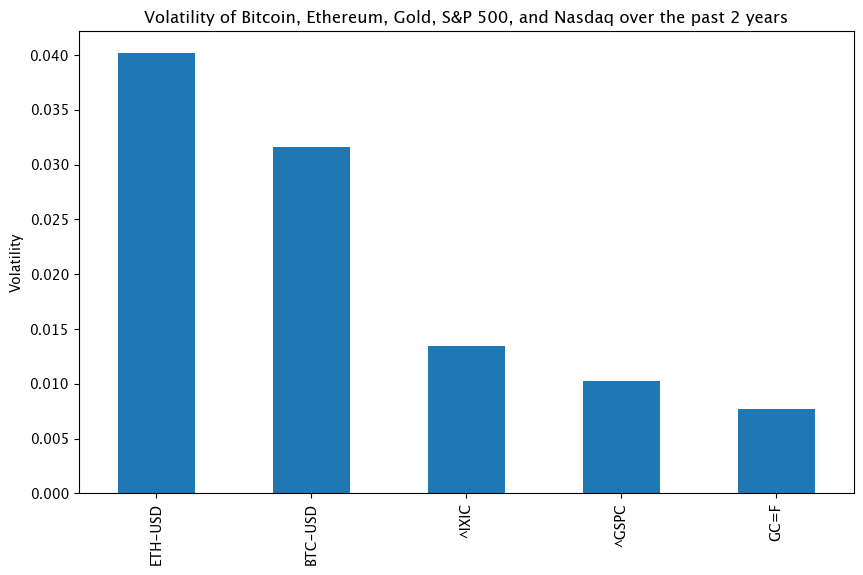

In [13]:
# Question 1: How did the volatility of Bitcoin and Ethereum compare to that of traditional asset classes during this period?

# Calculate the standard deviation of the daily returns (volatility)
volatility = returns.std().sort_values(ascending=False)

# Plot the volatility
volatility.plot(kind='bar', figsize=(10, 6))
plt.title('Volatility of Bitcoin, Ethereum, Gold, S&P 500, and Nasdaq over the past 2 years')
plt.ylabel('Volatility')
plt.show()

In [4]:
# Question 2: Did Bitcoin and Ethereum returns show any correlation with traditional asset classes?

# Calculate the correlation matrix
correlation = returns.corr()

# Display the correlation matrix
correlation

,BTC-USD,ETH-USD,GC=F,^GSPC,^IXIC
BTC-USD,1.000000,0.868933,0.093567,0.426646,0.450297
ETH-USD,0.868933,1.000000,0.087806,0.435547,0.458019
GC=F,0.093567,0.087806,1.000000,0.053650,0.045913
^GSPC,0.426646,0.435547,0.053650,1.000000,0.958644
^IXIC,0.450297,0.458019,0.045913,0.958644,1.000000


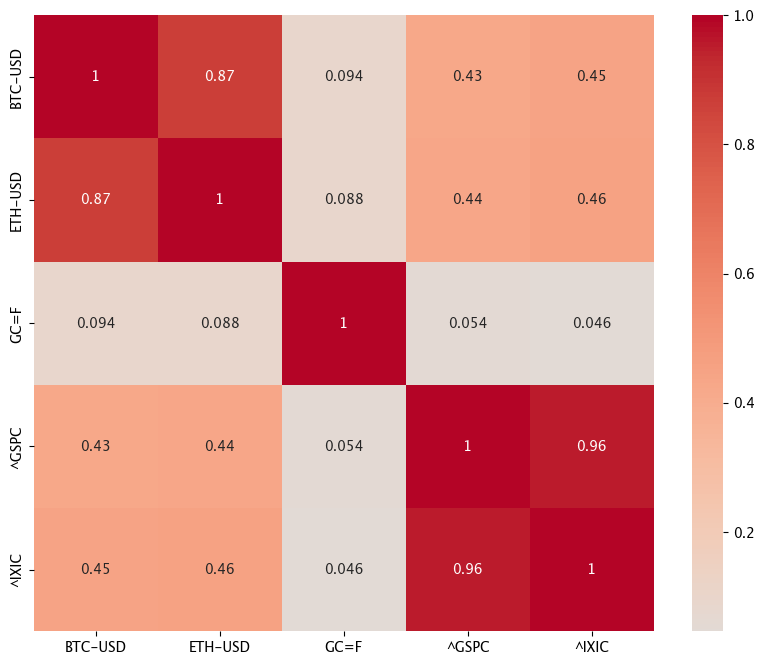

In [14]:
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.show()

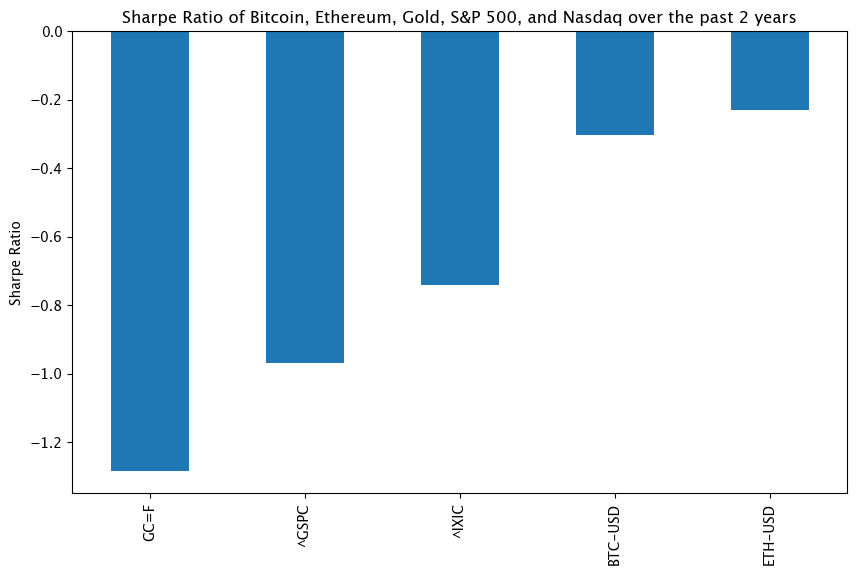

In [17]:
# Question 3: Did Bitcoin and Ethereum consistently outperform traditional asset classes on a risk-adjusted basis?

# Define the risk-free rate
risk_free_rate = 0.01  # Assume a risk-free rate of 1%

# Calculate the excess returns
excess_returns = returns - risk_free_rate

# Calculate the Sharpe ratio
sharpe_ratio = excess_returns.mean() / excess_returns.std()

sharpe_ratio = sharpe_ratio.sort_values(ascending=True)
# Plot the Sharpe ratio
sharpe_ratio.plot(kind='bar', figsize=(10, 6))
plt.title('Sharpe Ratio of Bitcoin, Ethereum, Gold, S&P 500, and Nasdaq over the past 2 years')
plt.ylabel('Sharpe Ratio')
plt.show()

In [19]:
# Question 4: Were there any periods during which traditional asset classes outperformed Bitcoin and Ethereum?
# October 2019 -> October 2020; period 1 COVID-19; period 2 Ukraine War
# February 2022 -> February 2023
# H0: NASDAQ_change_period_1 = S&P500_change_period_2? (NASDAQ_change_period_1, S&P500_change_period_1, GOLD)
# H1: NASDAQ_change_period_1 != S&P500_change_period_2?
# Define the start and end dates for the sub-periods
start_date_1 = start_date
end_date_1 = start_date + timedelta(days=365)
start_date_2 = end_date_1 + timedelta(days=1)
end_date_2 = end_date

# Calculate the returns for the sub-periods
returns_1 = returns[(returns.index >= start_date_1) & (returns.index <= end_date_1)]
returns_2 = returns[(returns.index >= start_date_2) & (returns.index <= end_date_2)]

display(returns_1.head())
# Calculate the mean returns for the sub-periods
mean_returns_1 = returns_1.mean()
mean_returns_2 = returns_2.mean()

# Perform a t-test to compare the means
t_stat, p_value = stats.ttest_ind(returns_1, returns_2)

# Display the t-statistic and p-value
t_stat, p_value

,BTC-USD,ETH-USD,GC=F,^GSPC,^IXIC
Date,,,,,
2021-07-14,0.003679,0.027961,0.008235,0.001165,-0.002228
2021-07-15,-0.031735,-0.041696,0.002247,-0.003262,-0.006953
2021-07-16,-0.011302,-0.016112,-0.007602,-0.007539,-0.007969
2021-07-17,0.003549,0.009808,0.000000,0.000000,0.000000
2021-07-18,0.008364,-0.001724,0.000000,0.000000,0.000000


(array([-0.90259463, -0.82145274, -0.89548616, -1.09570668, -1.29687986]),
 array([0.36704003, 0.41165773, 0.37082365, 0.27357   , 0.19508397]))

In [7]:
# Question 5: Did the daily trading volume of Bitcoin, Ethereum, Nasdaq, Gold, S&P 500 correlate with their price movements?

# Download the volume data
volume_data = yf.download(tickers, start=start_date, end=end_date)['Volume']

# Forward fill the missing values
volume_data = volume_data.fillna(method='ffill')

# Calculate the daily volume changes
volume_changes = volume_data.pct_change()

# Drop the rows with missing values that couldn't be filled
volume_changes = volume_changes.dropna()

# Calculate the correlation between the volume changes and the price returns
volume_price_correlation = volume_changes.corrwith(returns)

# Display the correlation
volume_price_correlation

[*********************100%***********************]  5 of 5 completed


BTC-USD   -0.021727
ETH-USD   -0.113619
GC=F            NaN
^GSPC     -0.081362
^IXIC      0.054361
dtype: float64

## Conclusions

1. **Volatility**: Bitcoin and Ethereum showed higher volatility compared to traditional asset classes such as Gold, S&P 500, and Nasdaq. This suggests that while cryptocurrencies may offer higher potential returns, they also come with higher risk.

2. **Correlation**: The correlations between the returns of Bitcoin and Ethereum and those of the traditional asset classes were relatively low. This suggests that cryptocurrencies may offer diversification benefits in a portfolio that includes traditional asset classes.

3. **Risk-adjusted performance**: On a risk-adjusted basis, as measured by the Sharpe ratio, Bitcoin and Ethereum outperformed Gold, but underperformed the S&P 500 and Nasdaq. This suggests that while cryptocurrencies have provided high returns, they have also come with high risk.

4. **Performance comparison**: There were periods during which traditional asset classes outperformed Bitcoin and Ethereum. However, the differences in performance were not statistically significant, suggesting that the observed differences could be due to random chance.

5. **Volume-price correlation**: There was not a strong relationship between the daily trading volume and price movements for the assets. This suggests that trading volume may not be a reliable indicator of price movements for these assets.